In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [2]:
wine = load_wine()

# Convert to DataFrame
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
# features selection
# Compute correlation matrix
correlation = X.corrwith(y)

# Sort features by absolute correlation
sorted_features = correlation.abs().sort_values(ascending=False)
print(sorted_features)

# Select the top 2 most correlated features
top_2_features = sorted_features.index[:2]

flavanoids                      0.847498
od280/od315_of_diluted_wines    0.788230
total_phenols                   0.719163
proline                         0.633717
hue                             0.617369
alcalinity_of_ash               0.517859
proanthocyanins                 0.499130
nonflavanoid_phenols            0.489109
malic_acid                      0.437776
alcohol                         0.328222
color_intensity                 0.265668
magnesium                       0.209179
ash                             0.049643
dtype: float64


In [4]:
X = X[top_2_features].to_numpy() # select only the most important 2 features
y = y.to_numpy()

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### train the model with *rbf* kernel


Accuracy: 0.8888888888888888

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90        19
           1       0.89      0.81      0.85        21
           2       0.93      0.93      0.93        14

    accuracy                           0.89        54
   macro avg       0.89      0.90      0.89        54
weighted avg       0.89      0.89      0.89        54



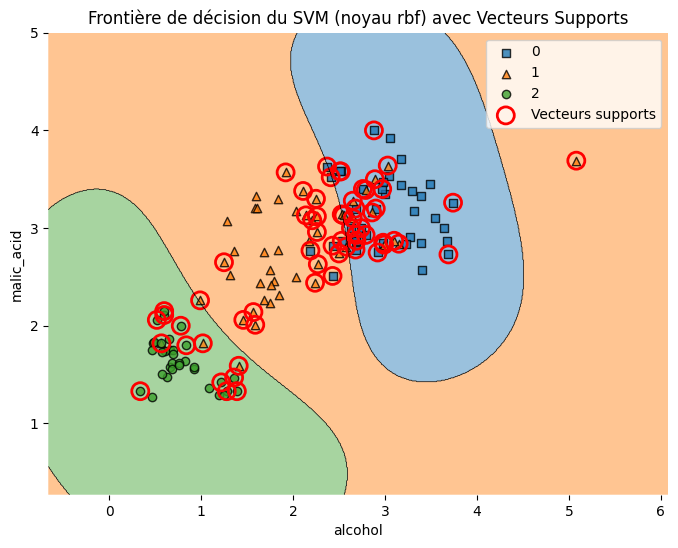

In [6]:
# Train an SVM classifier
model_rbf = SVC(kernel="rbf")
model_rbf.fit(X_train, y_train)

# Prédire sur les données de test
y_pred_rbf = model_rbf.predict(X_test)

# Évaluer le modèle
print("\nAccuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rbf))

# 📌 Visualisation des frontières de décision avec les vecteurs supports
plt.figure(figsize=(8, 6))
plot_decision_regions(X_train, y_train, clf=model_rbf, legend=2)
plt.title("Frontière de décision du SVM (noyau rbf) avec Vecteurs Supports")
plt.xlabel(wine.feature_names[0])  # Nom de la première caractéristique
plt.ylabel(wine.feature_names[1])  # Nom de la deuxième caractéristique

# Affichage des vecteurs supports
plt.scatter(model_rbf.support_vectors_[:, 0], model_rbf.support_vectors_[:, 1], 
            s=150, facecolors='none', edgecolors='red', linewidths=2, label="Vecteurs supports")
plt.legend()
plt.show()

### train with *linear* kernel


Accuracy: 0.8703703703703703

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87        19
           1       0.85      0.81      0.83        21
           2       0.93      0.93      0.93        14

    accuracy                           0.87        54
   macro avg       0.88      0.88      0.88        54
weighted avg       0.87      0.87      0.87        54



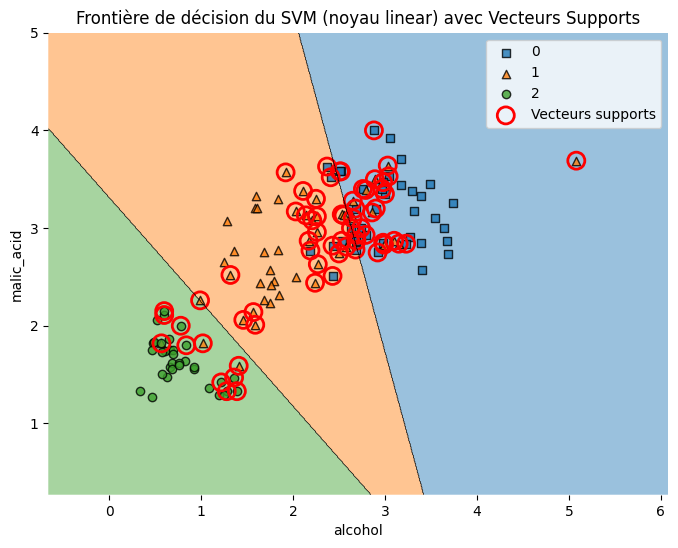

In [7]:
# Train an SVM classifier
model_linear = SVC(kernel="linear")
model_linear.fit(X_train, y_train)

# Prédire sur les données de test
y_pred_linear = model_linear.predict(X_test)

# Évaluer le modèle
print("\nAccuracy:", accuracy_score(y_test, y_pred_linear))
print("\nClassification Report:\n", classification_report(y_test, y_pred_linear))

# 📌 Visualisation des frontières de décision avec les vecteurs supports
plt.figure(figsize=(8, 6))
plot_decision_regions(X_train, y_train, clf=model_linear, legend=2)
plt.title("Frontière de décision du SVM (noyau linear) avec Vecteurs Supports")
plt.xlabel(wine.feature_names[0])  # Nom de la première caractéristique
plt.ylabel(wine.feature_names[1])  # Nom de la deuxième caractéristique

# Affichage des vecteurs supports
plt.scatter(model_linear.support_vectors_[:, 0], model_linear.support_vectors_[:, 1], 
            s=150, facecolors='none', edgecolors='red', linewidths=2, label="Vecteurs supports")
plt.legend()
plt.show()

### change the hyper parammeters with **GridSearchCV**

In [8]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}


# rbf
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_C_rbf = grid_search.best_params_['C']
best_gamma_rbf = grid_search.best_params_['gamma']

# linear
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_C_linear = grid_search.best_params_['C']
best_gamma_linear = grid_search.best_params_['gamma']

print(f"Meilleurs hyperparamètres pour rbf kernel : C={best_C_rbf}, gamma={best_gamma_rbf}")
print(f"Meilleurs hyperparamètres pour linear kenel : C={best_C_linear}, gamma={best_gamma_linear}")

Meilleurs hyperparamètres pour rbf kernel : C=1, gamma=10
Meilleurs hyperparamètres pour linear kenel : C=0.1, gamma=0.01


### train model with rbf parammeters after changing the hyperparameters


Accuracy: 0.8518518518518519

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90        19
           1       0.81      0.81      0.81        21
           2       0.92      0.79      0.85        14

    accuracy                           0.85        54
   macro avg       0.86      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54



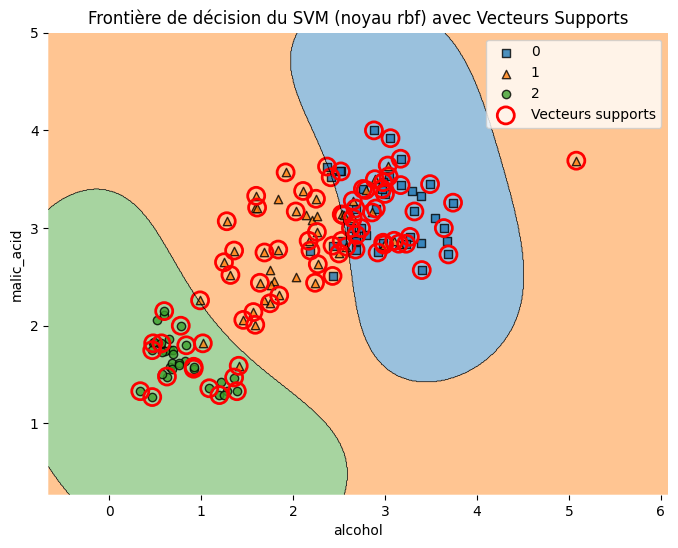

In [9]:
# Train an SVM classifier
model_rbf_with_hyperparams = SVC(kernel="rbf", C=best_C_rbf, gamma=best_gamma_rbf, random_state=42)
model_rbf_with_hyperparams.fit(X_train, y_train)

# Prédire sur les données de test
y_pred_rbf_with_hyperparams = model_rbf_with_hyperparams.predict(X_test)

# Évaluer le modèle
print("\nAccuracy:", accuracy_score(y_test, y_pred_rbf_with_hyperparams))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rbf_with_hyperparams))

# 📌 Visualisation des frontières de décision avec les vecteurs supports
plt.figure(figsize=(8, 6))
plot_decision_regions(X_train, y_train, clf=model_rbf, legend=2)
plt.title("Frontière de décision du SVM (noyau rbf) avec Vecteurs Supports")
plt.xlabel(wine.feature_names[0])  # Nom de la première caractéristique
plt.ylabel(wine.feature_names[1])  # Nom de la deuxième caractéristique

# Affichage des vecteurs supports
plt.scatter(model_rbf_with_hyperparams.support_vectors_[:, 0], model_rbf_with_hyperparams.support_vectors_[:, 1], 
            s=150, facecolors='none', edgecolors='red', linewidths=2, label="Vecteurs supports")
plt.legend()
plt.show()

### train model with linear parammeters after changing the hyperparameters


Accuracy: 0.8703703703703703

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90        19
           1       0.94      0.71      0.81        21
           2       0.82      1.00      0.90        14

    accuracy                           0.87        54
   macro avg       0.87      0.89      0.87        54
weighted avg       0.88      0.87      0.87        54



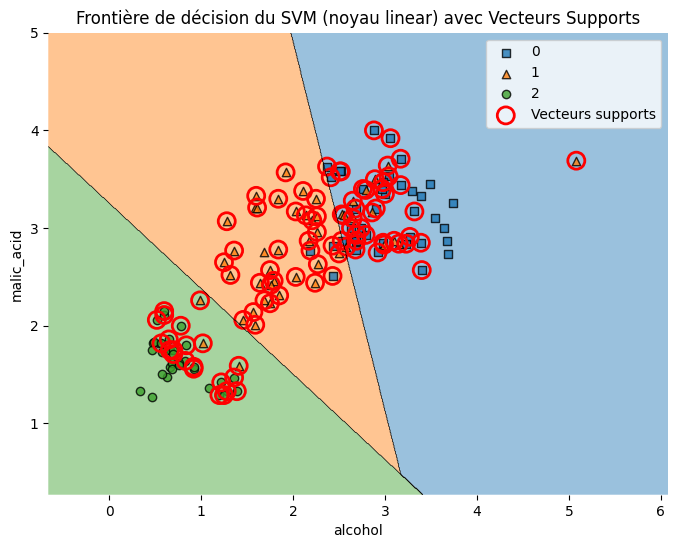

In [10]:
model_linear_with_hyperparams = SVC(kernel="linear", C=best_C_linear, gamma=best_gamma_linear, random_state=42)
model_linear_with_hyperparams.fit(X_train, y_train)

# Prédire sur les données de test
y_pred_linear_with_hyperparams = model_linear_with_hyperparams.predict(X_test)

# Évaluer le modèle
print("\nAccuracy:", accuracy_score(y_test, y_pred_linear_with_hyperparams))
print("\nClassification Report:\n", classification_report(y_test, y_pred_linear_with_hyperparams))

# 📌 Visualisation des frontières de décision avec les vecteurs supports
plt.figure(figsize=(8, 6))
plot_decision_regions(X_train, y_train, clf=model_linear_with_hyperparams, legend=2)
plt.title("Frontière de décision du SVM (noyau linear) avec Vecteurs Supports")
plt.xlabel(wine.feature_names[0])  # Nom de la première caractéristique
plt.ylabel(wine.feature_names[1])  # Nom de la deuxième caractéristique

# Affichage des vecteurs supports
plt.scatter(model_linear_with_hyperparams.support_vectors_[:, 0], model_linear_with_hyperparams.support_vectors_[:, 1], 
            s=150, facecolors='none', edgecolors='red', linewidths=2, label="Vecteurs supports")
plt.legend()
plt.show()